In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score
import sklearn.cluster
import sys
import scipy

In [2]:
df = pd.read_spss('/home/elina/Documents/thesis/2013Namibia/data/NBH2013_public_use_SPSS/NBH2013_Public_Use.sav')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,qnunwtg,qnfrvgg,qnanytbg,qnpa7g,qnpe5g,qnc1g,qnc2g,weight,stratum,psu
0,17 years old,Female,Grade 10,1.70,55.0,Most of the time,3 times per day,3 times per day,3 times per day,4 days,...,2.0,1.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0
1,16 years old,Male,Grade 10,1.80,63.0,Never,4 times per day,NaN,2 times per day,2 days,...,2.0,NaN,2.0,2.0,1.0,NaN,NaN,44.0416,201301023.0,46.0
2,16 years old,Female,Grade 10,1.53,46.0,Never,Less than one time per day,Less than one time per day,Less than one time per day,1 day,...,2.0,2.0,2.0,2.0,2.0,1.0,NaN,47.7660,201301023.0,46.0
3,15 years old,Female,Grade 10,1.55,43.0,Never,Less than one time per day,1 time per day,NaN,1 day,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0
4,16 years old,Female,Grade 10,1.53,50.0,Never,Less than one time per day,1 time per day,Less than one time per day,2 days,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,47.7660,201301023.0,46.0


### data clean

In [3]:
a=[]
for i in range(2,58):
    a.append(i)
for i in range(111,126):
    a.append(i)
df.drop(df.columns[a], axis=1, inplace=True)

In [4]:
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17 years old,Female,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0
1,16 years old,Male,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
2,16 years old,Female,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
3,15 years old,Female,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
4,16 years old,Female,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0


In [5]:
df.shape

(4531, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Q1      4486 non-null   category
 1   Q2      4470 non-null   category
 2   QN6     4449 non-null   float64 
 3   QN7     4483 non-null   float64 
 4   QN8     4478 non-null   float64 
 5   QN9     4480 non-null   float64 
 6   QN10    4522 non-null   float64 
 7   QN11    4511 non-null   float64 
 8   QN12    4500 non-null   float64 
 9   QN13    4489 non-null   float64 
 10  QN14    4454 non-null   float64 
 11  QN15    4447 non-null   float64 
 12  QN16    4510 non-null   float64 
 13  QN17    3970 non-null   float64 
 14  QN18    1788 non-null   float64 
 15  QN19    1763 non-null   float64 
 16  QN20    4136 non-null   float64 
 17  QN21    1630 non-null   float64 
 18  QN22    4482 non-null   float64 
 19  QN23    4486 non-null   float64 
 20  QN24    4387 non-null   float64 
 21  QN25    4451 n

In [7]:
df[['Q1']] = df[['Q1']].replace(['17 years old','16 years old','15 years old','18 years old or older','13 years old','14 years old','12 years old','11 years old or younger'],
               [17,16,15,18,13,14,12,11])
df[['Q2']] = df[['Q2']].replace(['Male','Female'],[1,2])
df[['QN7']] = df[['QN7']].replace([2,1],[1,2])
df[['QN8']] = df[['QN8']].replace([2,1],[1,2])
df[['QN47']] = df[['QN47']].replace([2,1],[1,2])
df[['QN48']] = df[['QN48']].replace([2,1],[1,2])
df[['QN49']] = df[['QN49']].replace([2,1],[1,2])
df[['QN51']] = df[['QN51']].replace([2,1],[1,2])
df[['QN54']] = df[['QN54']].replace([2,1],[1,2])
df[['QN55']] = df[['QN55']].replace([2,1],[1,2])
df[['QN57']] = df[['QN57']].replace([2,1],[1,2])
df[['QN58']] = df[['QN58']].replace([2,1],[1,2])
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
1,16.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
2,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
3,15.0,2.0,2.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
4,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0


In [8]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df = df.corr()
print(correlation_df)

            Q1        Q2       QN6       QN7       QN8       QN9      QN10  \
Q1    1.000000 -0.125712  0.005218 -0.164670 -0.141019  0.096857  0.087565   
Q2   -0.125712  1.000000  0.004056 -0.012526 -0.017286 -0.007025  0.036398   
QN6   0.005218  0.004056  1.000000  0.003779 -0.017780 -0.044789  0.030007   
QN7  -0.164670 -0.012526  0.003779  1.000000  0.323944 -0.262852 -0.218904   
QN8  -0.141019 -0.017286 -0.017780  0.323944  1.000000 -0.211067 -0.248217   
QN9   0.096857 -0.007025 -0.044789 -0.262852 -0.211067  1.000000  0.210828   
QN10  0.087565  0.036398  0.030007 -0.218904 -0.248217  0.210828  1.000000   
QN11  0.048358  0.012183  0.107813  0.050308  0.018409 -0.110029  0.005287   
QN12  0.028860  0.006278  0.048457  0.024702 -0.006108 -0.009038  0.024425   
QN13  0.021624  0.047471  0.063998  0.053578  0.012979 -0.040405  0.000412   
QN14  0.004512  0.020816  0.057669  0.079950  0.049712 -0.082625 -0.056640   
QN15  0.043967  0.079268  0.117677 -0.027433 -0.070649  0.025397

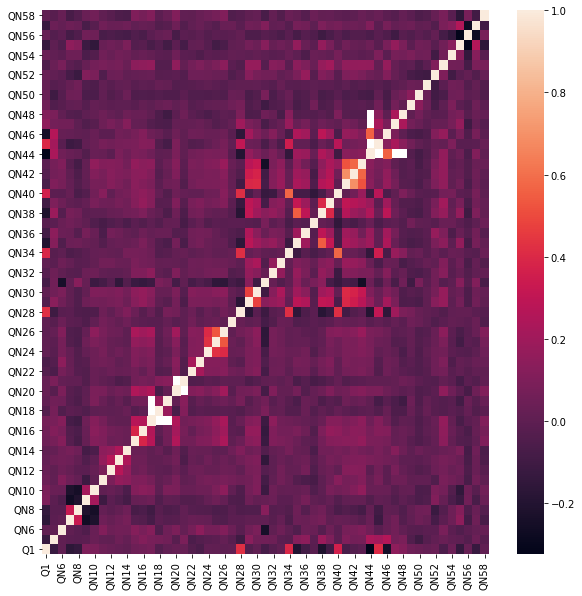

In [9]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df)
ax.invert_yaxis()

In [10]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
dataset_ite = imp.transform(df)
df = pd.DataFrame(dataset_ite,columns= df.columns)
df.to_csv('df_ite.csv',index = False)

/home/elina/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [11]:
df.isnull().values.any()

False

In [12]:
for i in df.columns[1:55]:
    df.loc[df[i] >= 1.5,i] =2
    df.loc[df[i] < 1.5,i] =1
df.loc[df['Q1'] < 11.5,'Q1'] =11
df.loc[(df['Q1'] < 12.5)&(df['Q1'] >= 11.5),'Q1'] =12
df.loc[(df['Q1'] < 13.5)&(df['Q1'] >= 12.5),'Q1'] =13
df.loc[(df['Q1'] < 14.5)&(df['Q1'] >= 13.5),'Q1'] =14
df.loc[(df['Q1'] < 15.5)&(df['Q1'] >= 14.5),'Q1'] =15
df.loc[(df['Q1'] < 16.5)&(df['Q1'] >= 15.5),'Q1'] =16
df.loc[(df['Q1'] < 17.5)&(df['Q1'] >= 16.5),'Q1'] =17
df.loc[df['Q1'] >= 17.5,'Q1'] =18
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
1,16.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
2,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
3,15.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
4,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0


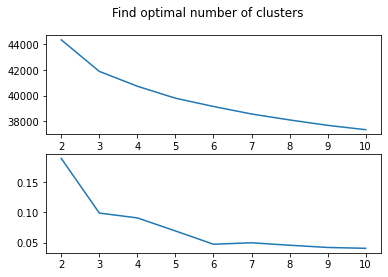

In [13]:
y = []
z = []
for i in range(2,11):
    kmeans = sklearn.cluster.KMeans(n_clusters=i, random_state=0).fit(df)
    y.append(kmeans.inertia_)
    z.append(silhouette_score(df, kmeans.labels_))
x = np.linspace(2,10,9)
fig, axs = plt.subplots(2)
fig.suptitle("Find optimal number of clusters")
#plt.figure(figsize=(10,5))
axs[0].plot(x,y)
axs[1].plot(x,z)
#plt.show()

In [14]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = sklearn.cluster.KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
     
        km = sklearn.cluster.KMeans(k)
        km.fit(data) 
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

Text(0.5, 1.0, 'Gap Statistic vs. K')

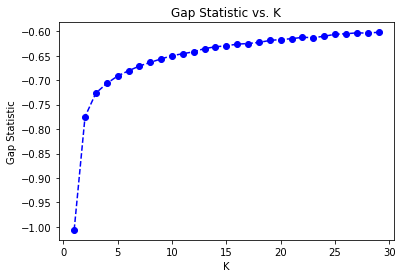

In [15]:
score_g, rdf = optimalK(df, nrefs=5, maxClusters=30)
plt.plot(rdf['clusterCount'], rdf['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

In [43]:
DBSCAN = sklearn.cluster.DBSCAN(eps=2.5,algorithm='auto',min_samples=10).fit(df)
print(DBSCAN.labels_)
#print(f'Silhouette Score: {silhouette_score(df, DBSCAN.labels_)}')
#‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’ 
#-1 means noise 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [17]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(df)
        score.append((cov,n_comp,gmm.bic(df)))
score

[('spherical', 1, 339332.1387644592),
 ('spherical', 2, 283931.3967334517),
 ('spherical', 3, 273436.4992952059),
 ('spherical', 4, 268081.9694267294),
 ('spherical', 5, 265386.4378397499),
 ('spherical', 6, 262001.1427189359),
 ('spherical', 7, 260065.3818324971),
 ('spherical', 8, 257957.55897883105),
 ('spherical', 9, 256371.31516628605),
 ('tied', 1, 211237.83561503908),
 ('tied', 2, 157142.99103221405),
 ('tied', 3, 156736.60085906496),
 ('tied', 4, 152010.32079011016),
 ('tied', 5, 148942.98089973553),
 ('tied', 6, 102855.25011691039),
 ('tied', 7, 190231.20376769436),
 ('tied', 8, 147147.85045681067),
 ('tied', 9, 97533.65415505125),
 ('diag', 1, 256403.7678080852),
 ('diag', 2, 50910.63696556508),
 ('diag', 3, -75862.72623757925),
 ('diag', 4, -92487.32767594162),
 ('diag', 5, -140084.75951504748),
 ('diag', 6, -209480.62243016827),
 ('diag', 7, -221278.81475338282),
 ('diag', 8, -270845.52583978226),
 ('diag', 9, -255860.2875658904),
 ('full', 1, 211237.83561503905),
 ('full',

In [18]:
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, kmeans.labels_)}')

Silhouette Score(n=2): 0.18948492691664365


In [19]:
gmm=GaussianMixture(n_components=9,covariance_type='diag').fit(df)


 Hierarchical clustering

In [20]:
AgglomerativeClustering_ward = sklearn.cluster.AgglomerativeClustering(n_clusters = 3,linkage='ward').fit(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, AgglomerativeClustering_ward.labels_)}')
#Ward minimizes the sum of squared differences within all clusters. 
#It is a variance-minimizing approach and in this sense is similar to the k-means objective function 
#but tackled with an agglomerative hierarchical approach.

Silhouette Score(n=3): 0.07329221953170037


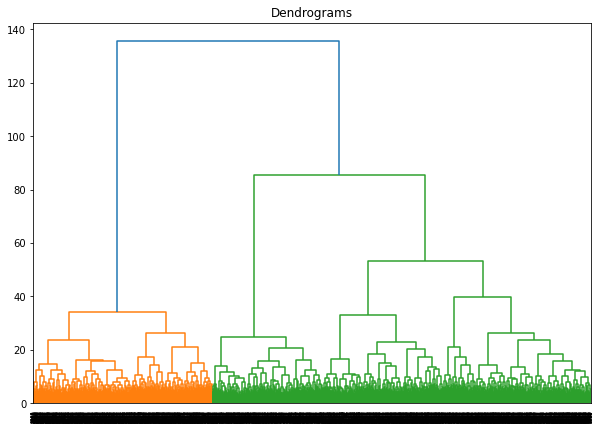

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(df, method='ward'))

In [21]:
DBSCAN = sklearn.cluster.DBSCAN(eps=3,algorithm='kd_tree',min_samples=100).fit(df)
print(DBSCAN.labels_)
#print(f'Silhouette Score: {silhouette_score(df, DBSCAN.labels_)}')
#‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’

[-1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0  0 -1  0
  0 -1  0  0  0  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0 -1  0  0  0  0  0
  0 -1 -1  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1 -1  0 -1  0  0  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1
  0 -1  0  0 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0 -1  0 -1  0  0
 -1  0  0 -1  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0
 -1 -1  0  0  0  0  0 -1  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1
  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1
  0 -1 -1  0  0 -1  0  0 -1  0  0 -1 -1 -1  0 -1  0 -1  0  0 -1  0 -1  0
 -1 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0

In [22]:
AgglomerativeClustering_complete = sklearn.cluster.AgglomerativeClustering(n_clusters = 3,linkage='complete').fit(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, AgglomerativeClustering_complete.labels_)}')
#complete linkage minimizes the maximum distance between observations of pairs of clusters.

Silhouette Score(n=3): 0.0805410092220042


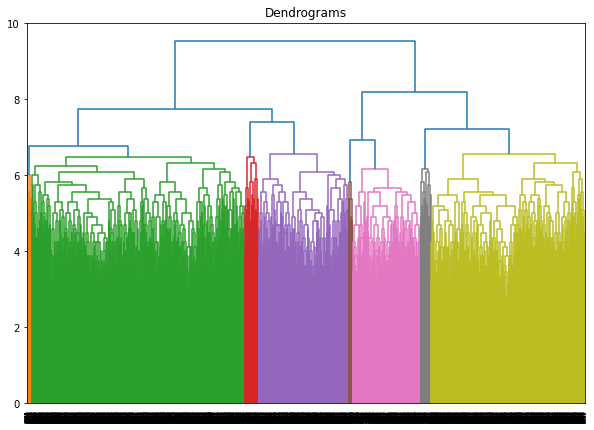

In [23]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(df, method='complete'))

In [24]:
AgglomerativeClustering_single = sklearn.cluster.AgglomerativeClustering(n_clusters = 3,linkage='single').fit(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, AgglomerativeClustering_single.labels_)}')
#‘single’ uses the minimum of the distances between all observations of the two sets.

Silhouette Score(n=3): 0.13205796794255892


In [25]:
AgglomerativeClustering_average = sklearn.cluster.AgglomerativeClustering(n_clusters = 3,linkage='average').fit(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, AgglomerativeClustering_average.labels_)}')
#‘average’ uses the average of the distances of each observation of the two sets.

Silhouette Score(n=3): 0.14825103033125342


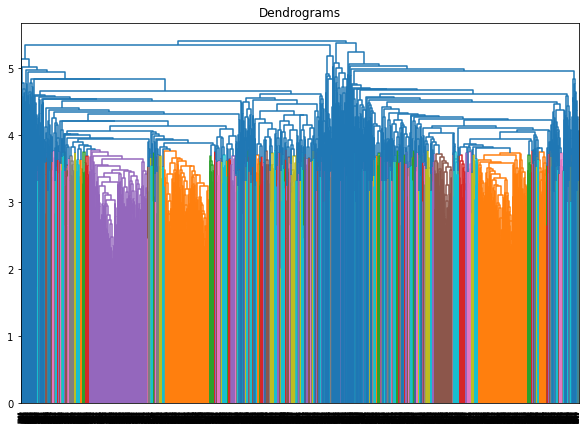

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(df, method='average'))

In [27]:
SpectralClustering = sklearn.cluster.SpectralClustering(n_clusters=3,assign_labels='discretize',random_state=0).fit(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, SpectralClustering.labels_)}')

Silhouette Score(n=3): 0.01815722286994391


## Group features with means

In [28]:
col_list_dietary_behaviours = ['QN6','QN7','QN8','QN9','QN10']
col_list_hygiene = ['QN11','QN12','QN13','QN14']
col_list_injury = ['QN15','QN16','QN17','QN18','QN19','QN20','QN21']
col_list_mental_health = ['QN22','QN23','QN24','QN25','QN26','QN27']
col_list_tobacco_use = ['QN28','QN29','QN30','QN31','QN32','QN33']
col_list_alcohol_use = ['QN34','QN35','QN36','QN37','QN38','QN39']
col_list_drug_use = ['QN40','QN41','QN42','QN43']
col_list_sexual_behaviours = ['QN44','QN45','QN46','QN47','QN48']
col_list_physical_activity = ['QN49','QN50','QN51','QN52']
col_list_protective_factors = ['QN53','QN54','QN55','QN56','QN57','QN58']
df['dietary_behaviours'] = df[col_list_dietary_behaviours].mean(axis=1)
df['hygiene'] = df[col_list_hygiene].mean(axis=1)
df['injury'] = df[col_list_injury].mean(axis=1)
df['mental_health'] = df[col_list_mental_health].mean(axis=1)
df['tobacco_use'] = df[col_list_tobacco_use].mean(axis=1)
df['alcohol_use'] = df[col_list_alcohol_use].mean(axis=1)
df['drug_use'] = df[col_list_drug_use].mean(axis=1)
df['sexual_behaviours'] = df[col_list_sexual_behaviours].mean(axis=1)
df['physical_activity'] = df[col_list_physical_activity].mean(axis=1)
df['protective_factors'] = df[col_list_protective_factors].mean(axis=1)
df.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,dietary_behaviours,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors
0,17.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.4,2.0,1.571429,1.333333,1.833333,1.833333,2.00,1.8,1.00,1.833333
1,16.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.6,2.0,1.857143,2.000000,1.500000,1.833333,2.00,1.6,1.25,1.666667
2,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.6,2.0,2.000000,2.000000,1.666667,1.500000,1.75,1.4,1.00,1.500000
3,15.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.6,2.0,1.857143,2.000000,1.833333,2.000000,2.00,1.4,1.00,1.500000
4,16.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.6,2.0,2.000000,2.000000,1.666667,1.833333,2.00,1.6,1.00,1.833333


In [29]:
a=[]
for i in range(2,55):
    a.append(i)
df.drop(df.columns[a], axis=1, inplace=True)
#for i in df.columns[2:12]:
#    df.loc[df[i] >= 1.5,i] =2
#    df.loc[df[i] < 1.5,i] =1
#df.to_csv('df_gf_ite.csv',index = False)
#df.head()

In [30]:
correlation_df_gf = df.corr()
print(correlation_df_gf)

                          Q1        Q2  dietary_behaviours   hygiene  \
Q1                  1.000000 -0.127460           -0.054519  0.040983   
Q2                 -0.127460  1.000000           -0.004339  0.034562   
dietary_behaviours -0.054519 -0.004339            1.000000  0.034549   
hygiene             0.040983  0.034562            0.034549  1.000000   
injury              0.056126  0.172849            0.058252  0.107870   
mental_health      -0.020901 -0.023333            0.076220  0.104060   
tobacco_use         0.158442  0.065812           -0.042473  0.064369   
alcohol_use        -0.021413  0.172486            0.069452  0.063439   
drug_use            0.305209  0.043050            0.026207  0.175152   
sexual_behaviours   0.258541  0.219082           -0.045805  0.124548   
physical_activity   0.069415 -0.087039           -0.008414  0.020633   
protective_factors -0.109878  0.010557            0.007960  0.075491   

                      injury  mental_health  tobacco_use  alcoh

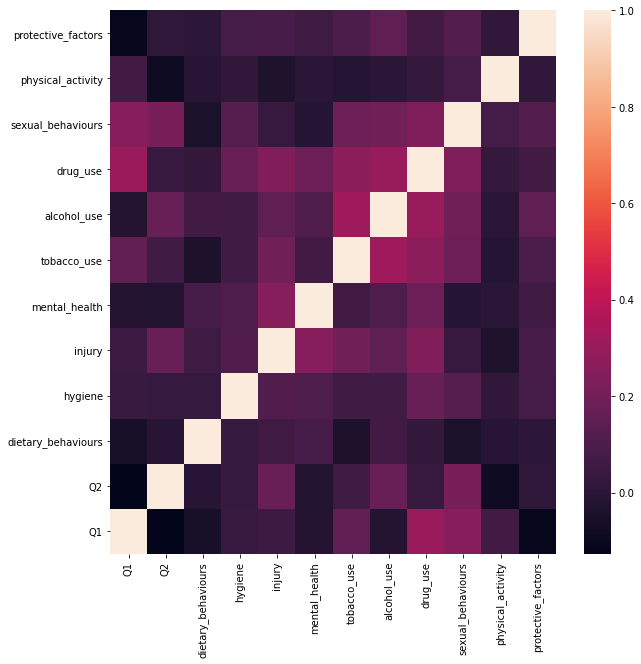

In [31]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_gf)
ax.invert_yaxis()

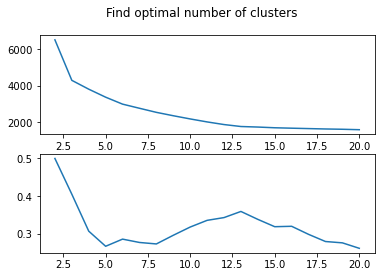

In [32]:
y = []
z = []
for i in range(2,21):
    kmeans = sklearn.cluster.KMeans(n_clusters=i, random_state=0).fit(df)
    y.append(kmeans.inertia_)
    z.append(silhouette_score(df, kmeans.labels_))
x = np.linspace(2,20,19)
fig, axs = plt.subplots(2)
fig.suptitle("Find optimal number of clusters")
#plt.figure(figsize=(10,5))
axs[0].plot(x,y)
axs[1].plot(x,z)
#plt.show()

Text(0.5, 1.0, 'Gap Statistic vs. K')

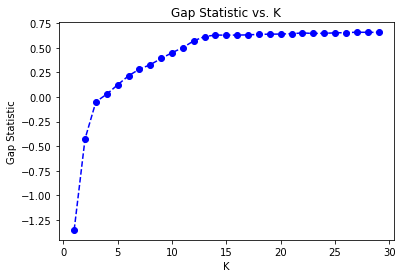

In [33]:
score_g, rdf = optimalK(df, nrefs=5, maxClusters=30)
plt.plot(rdf['clusterCount'], rdf['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

In [34]:
kmeans_gf = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, kmeans_gf.labels_)}')

Silhouette Score(n=2): 0.4993496547265067


In [35]:
kmeans_gf = sklearn.cluster.KMeans(n_clusters=13, random_state=0).fit(df)
print(f'Silhouette Score(n=13): {silhouette_score(df, kmeans_gf.labels_)}')

Silhouette Score(n=13): 0.3589819567436257


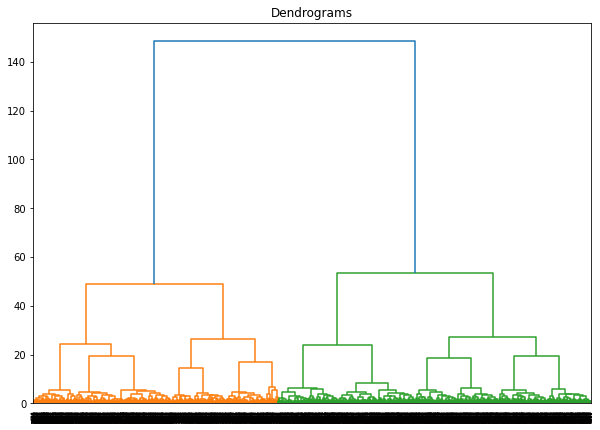

In [36]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(df, method='ward'))

In [37]:
AgglomerativeClustering_ward_gf = sklearn.cluster.AgglomerativeClustering(n_clusters = 2,linkage='ward').fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, AgglomerativeClustering_ward_gf.labels_)}')
#Ward minimizes the sum of squared differences within all clusters. 
#It is a variance-minimizing approach and in this sense is similar to the k-means objective function 
#but tackled with an agglomerative hierarchical approach.

Silhouette Score(n=2): 0.4993496547265067


In [38]:
AgglomerativeClustering_ward_gf = sklearn.cluster.AgglomerativeClustering(n_clusters = 3,linkage='ward').fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, AgglomerativeClustering_ward_gf.labels_)}')
#Ward minimizes the sum of squared differences within all clusters. 
#It is a variance-minimizing approach and in this sense is similar to the k-means objective function 
#but tackled with an agglomerative hierarchical approach.

Silhouette Score(n=2): 0.357027938652313


In [39]:
AgglomerativeClustering_complete_gf = sklearn.cluster.AgglomerativeClustering(n_clusters = 2,linkage='complete').fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, AgglomerativeClustering_complete_gf.labels_)}')
#complete linkage minimizes the maximum distance between observations of pairs of clusters.

Silhouette Score(n=2): 0.37555411841814196


In [40]:
AgglomerativeClustering_single_gf = sklearn.cluster.AgglomerativeClustering(n_clusters = 2,linkage='single').fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, AgglomerativeClustering_single_gf.labels_)}')
#‘single’ uses the minimum of the distances between all observations of the two sets.

Silhouette Score(n=2): 0.42393998768919344


In [41]:
AgglomerativeClustering_average_gf = sklearn.cluster.AgglomerativeClustering(n_clusters = 2,linkage='average').fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, AgglomerativeClustering_average_gf.labels_)}')
#‘average’ uses the average of the distances of each observation of the two sets.

Silhouette Score(n=2): 0.4659482740296711


In [42]:
SpectralClustering = sklearn.cluster.SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(df)
print(f'Silhouette Score(n=2): {silhouette_score(df, SpectralClustering.labels_)}')

Silhouette Score(n=2): 0.4993496547265067
